In [42]:
import numpy as np 
import tensorflow as tf 
import cv2 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import to_categorical


In [43]:
# load dataset 
data=tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=data.load_data()


In [44]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


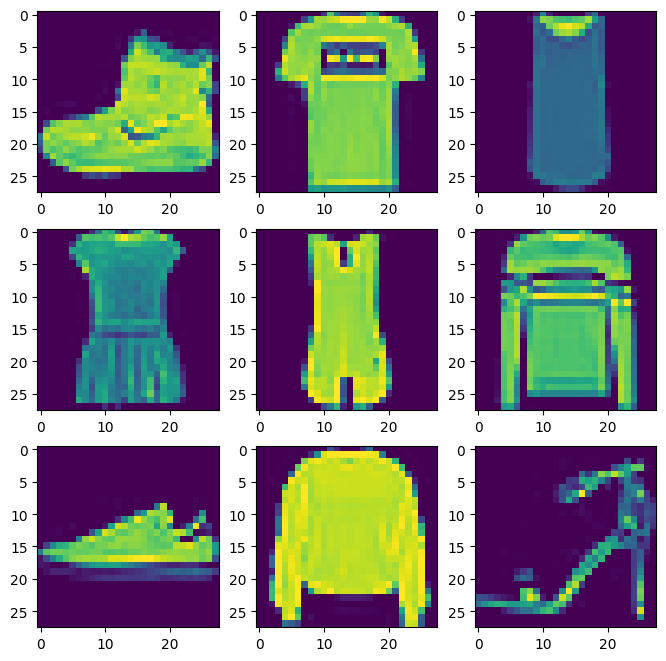

In [45]:
#visualize images
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
def plotdata(images,num):
    plt.figure(figsize=(8,8))
    for i in range(num):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
    plt.show()

plotdata(xtrain,9)

# SIFT

In [46]:
sift=cv2.SIFT_create()



In [47]:
def extract_features(image):
    features=[]
    for i in image:
        keypoint,descriptor=sift.detectAndCompute(i,None)
        if descriptor is not None:
            features.append(np.mean(descriptor,axis=0))
        else:
            features.append(np.zeros(128))
    return np.array(features)

In [48]:
xtrain_sift=extract_features(xtrain)
xtest_sift=extract_features(xtest)



In [49]:
scaler=StandardScaler()
xtrain_sift=scaler.fit_transform(xtrain_sift)
xtest_sift=scaler.transform(xtest_sift)

In [50]:
y_trainc=to_categorical(ytrain,10)
y_testc=to_categorical(ytest,10)

In [51]:
model=Sequential([
    Dense(512,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(256,activation='relu',input_shape=(128,)),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

In [52]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [53]:
model.fit(xtrain_sift,y_trainc,epochs=20,batch_size=32,validation_data=(xtest_sift,y_testc))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2811 - accuracy: 0.5609 - val_loss: 1.0822 - val_accuracy: 0.6196
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1101 - accuracy: 0.6188 - val_loss: 1.0456 - val_accuracy: 0.6358
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0514 - accuracy: 0.6368 - val_loss: 1.0142 - val_accuracy: 0.6448
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0121 - accuracy: 0.6513 - val_loss: 1.0062 - val_accuracy: 0.6530
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9804 - accuracy: 0.6622 - val_loss: 0.9789 - val_accuracy: 0.6586
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9486 - accuracy: 0.6698 - val_loss: 0.9668 - val_accuracy: 0.6629
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9282 - accuracy: 0.6765 - val_loss: 0.9753 - val_accuracy:

In [54]:
tloss,tacc=model.evaluate(xtest_sift,y_testc)

313/313 [==============================] - 1s 2ms/step - loss: 0.9589 - accuracy: 0.6799


In [55]:
print(f'test_accuracy:{tacc*100: .2f}%')

test_accuracy: 67.99%


# Task 2

In [56]:
model2=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512,activation='relu'),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='softmax')
    
])

In [57]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [58]:
xtrain2=xtrain/255
xtest2=xtest/255

In [59]:
model2.fit(xtrain2,y_trainc,epochs=20,batch_size=32,validation_data=(xtest2,y_testc))

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5969 - accuracy: 0.7850 - val_loss: 0.4469 - val_accuracy: 0.8377
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4521 - accuracy: 0.8391 - val_loss: 0.4032 - val_accuracy: 0.8537
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4142 - accuracy: 0.8521 - val_loss: 0.4009 - val_accuracy: 0.8556
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3972 - accuracy: 0.8581 - val_loss: 0.3900 - val_accuracy: 0.8570
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3808 - accuracy: 0.8639 - val_loss: 0.3721 - val_accuracy: 0.8684
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3636 - accuracy: 0.8682 - val_loss: 0.3645 - val_accuracy: 0.8697
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3567 - accuracy: 0.8719 - val_loss: 0.3625 - val_ac

In [60]:
tloss,tacc=model2.evaluate(xtest2,y_testc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3235 - accuracy: 0.8831
